In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pickle


In [2]:
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.5.2


In [8]:
train_df=pd.read_csv(r'/content/train.csv')
test_df=pd.read_csv(r'//content/test.csv')
display(train_df)

,age,education,marital-status,sex,hours-per-week,income,capital_gain_binary,capital_loss_binary,workclass_0,workclass_1,...,relationship_2,race_0,race_1,race_2,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.301370,9.0,4.0,1.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.452055,9.0,2.0,1.0,0.122449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.287671,11.0,0.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.493151,1.0,2.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.150685,9.0,2.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,7.0,2.0,0.0,0.377551,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.315068,11.0,2.0,1.0,0.397959,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32558,0.561644,11.0,6.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32559,0.068493,11.0,4.0,1.0,0.193878,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
x_train_pre=train_df.drop('income', axis =1)
y_train_pre=train_df['income']

x_test=test_df.drop('income', axis =1)
y_test=test_df['income']

In [10]:
x_train, x_val, y_train, y_val=train_test_split(x_train_pre, y_train_pre,test_size=0.2
, random_state=42)

In [11]:
print('x_test')
x_test

x_test


,age,education,marital-status,sex,hours-per-week,capital_gain_binary,capital_loss_binary,workclass_0,workclass_1,workclass_2,...,relationship_2,race_0,race_1,race_2,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.109589,1.0,4.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.287671,11.0,2.0,1.0,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.150685,7.0,2.0,1.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.369863,15.0,2.0,1.0,0.397959,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.013699,15.0,4.0,0.0,0.295918,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,9.0,0.0,0.0,0.357143,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16277,0.643836,11.0,6.0,1.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16278,0.287671,9.0,2.0,1.0,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16279,0.369863,9.0,0.0,1.0,0.397959,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
print('y_test')
y_test

y_test


,income
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
16276,0.0
16277,0.0
16278,0.0
16279,0.0


In [13]:
print('x_train')
x_train

x_train


,age,education,marital-status,sex,hours-per-week,capital_gain_binary,capital_loss_binary,workclass_0,workclass_1,workclass_2,...,relationship_2,race_0,race_1,race_2,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
5514,0.219178,9.0,4.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19777,0.260274,8.0,2.0,1.0,0.500000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10781,0.561644,6.0,5.0,1.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32240,0.054795,8.0,2.0,1.0,0.459184,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9876,0.136986,15.0,0.0,1.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.410959,9.0,2.0,1.0,0.397959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5390,0.191781,2.0,0.0,0.0,0.204082,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.013699,1.0,4.0,0.0,0.193878,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15795,0.452055,11.0,2.0,1.0,0.846939,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
print('y_train')
y_train

y_train


,income
5514,1.0
19777,1.0
10781,0.0
32240,0.0
9876,0.0
...,...
29802,0.0
5390,0.0
860,0.0
15795,0.0


## check for data imbalance for `x_train` and `y_train`

class distribution for Train is: 
income
0.0    19778
1.0     6270
Name: count, dtype: int64
class distribution for Validation is: 
income
0.0    4942
1.0    1571
Name: count, dtype: int64
class distribution for Test is: 
income
0.0    12435
1.0     3846
Name: count, dtype: int64


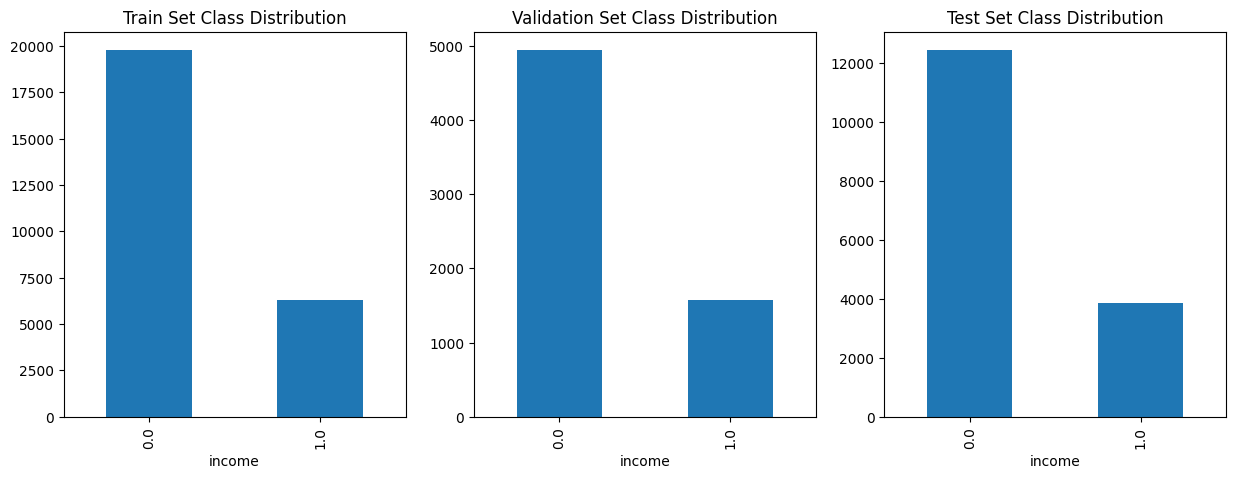

In [15]:
import matplotlib.pyplot as plt

def class_dist(data, data_name):
  value_counts=data.value_counts()
  print(f'class distribution for {data_name} is: ')
  print(value_counts)
  return value_counts
y_train_dist=class_dist(y_train, 'Train')
y_val_dist=class_dist(y_val, 'Validation')
y_test_dist=class_dist(y_test, 'Test')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
y_train_dist.plot(kind='bar', ax=ax[0], title='Train Set Class Distribution')
y_val_dist.plot(kind='bar', ax=ax[1], title='Validation Set Class Distribution')
y_test_dist.plot(kind='bar', ax=ax[2], title='Test Set Class Distribution')
plt.show()

## Option 1

run model without balancing the data

In [16]:
def evaluation_prediction(x,y,x_train,y_train,data_name, class_weight=None):
  model=DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight=class_weight)
  model.fit(x_train, y_train)
  y_val_pred=model.predict(x)
  accuracy=accuracy_score(y, y_val_pred)
  print(f'\n{data_name} Set Results:')
  print(f'{data_name} Accuracy: {accuracy:.2f}')
  print(f'Classification Report {data_name}:')
  print(classification_report(y, y_val_pred))
  print(f'Confusion Matrix {data_name}:')
  print(confusion_matrix(y, y_val_pred))
evaluation_prediction(x_val, y_val,x_train, y_train,'Validation', class_weight=None)
evaluation_prediction(x_test, y_test,x_train, y_train, 'Test', class_weight=None)



Validation Set Results:
Validation Accuracy: 0.79
Classification Report Validation:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      4942
         1.0       0.57      0.55      0.56      1571

    accuracy                           0.79      6513
   macro avg       0.71      0.71      0.71      6513
weighted avg       0.79      0.79      0.79      6513

Confusion Matrix Validation:
[[4289  653]
 [ 706  865]]

Test Set Results:
Test Accuracy: 0.70
Classification Report Test:
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80     12435
         1.0       0.40      0.49      0.44      3846

    accuracy                           0.70     16281
   macro avg       0.61      0.63      0.62     16281
weighted avg       0.73      0.70      0.71     16281

Confusion Matrix Test:
[[9551 2884]
 [1947 1899]]


Early-pruning the tree

In [17]:
def pruning_tree(x_train, y_train, x_val, y_val, x_test, y_test, class_weight=None):
  param_grid = {
      'max_depth': [5, 10, 15, 20,30, None],
      'min_samples_split': [2, 5, 10, 15],
      'min_samples_leaf': [1, 2, 4, 5, 10],
      'criterion': ['entropy'],
      'class_weight': [class_weight, None]
  }
  # Perform grid search
  grid_search = GridSearchCV(
      estimator=DecisionTreeClassifier(random_state=42),
      param_grid=param_grid,
      scoring='f1_macro',
      cv=5
  )

  # Fit the grid search
  grid_search.fit(x_train, y_train)

  # Best parameters and best score
  print(f'Best Hyperparameters: {grid_search.best_params_}')
  print(f'Best Accuracy: {grid_search.best_score_:.2f}')

  # Retraining the model with the best parameters
  best_model = grid_search.best_estimator_
  with open("decisionTree.pki", 'wb') as f:
    pickle.dump(best_model, f)
  y_val_pruning=best_model.predict(x_val)
  y_test_pruning=best_model.predict(x_test)

  # Evaluate the pruned model on Validation and Test sets
  print("\nValidation Set Evaluation after Pruning:")
  evaluation_prediction(x_val, y_val_pruning,x_train, y_train, 'Validation', class_weight=class_weight)
  print("\nTest Set Evaluation after Pruning:")
  evaluation_prediction(x_test, y_test_pruning,x_train, y_train, 'Test', class_weight=class_weight)

# Run the pruning function
pruning_tree(x_train, y_train, x_val, y_val, x_test, y_test, class_weight=None)


Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.75

Validation Set Evaluation after Pruning:

Validation Set Results:
Validation Accuracy: 0.84
Classification Report Validation:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      5183
         1.0       0.60      0.68      0.64      1330

    accuracy                           0.84      6513
   macro avg       0.76      0.78      0.77      6513
weighted avg       0.85      0.84      0.84      6513

Confusion Matrix Validation:
[[4570  613]
 [ 425  905]]

Test Set Evaluation after Pruning:

Test Set Results:
Test Accuracy: 0.77
Classification Report Test:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     11702
         1.0       0.59      0.62      0.61      4579

    accuracy                           0.77     16281
   macro avg    

## Option 2

Balancing the data with the same df

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote=SMOTE(sampling_strategy='auto', random_state=42)
x_train_res, y_train_res=smote.fit_resample(x_train, y_train)

In [20]:
# Count class occurrences
value_counts = y_train_res.value_counts()
print(value_counts)
print(x_train.shape)
print(x_train_res.shape)

income
1.0    19778
0.0    19778
Name: count, dtype: int64
(26048, 27)
(39556, 27)


In [21]:

evaluation_prediction(x_val, y_val,x_train_res, y_train_res,'Validation',class_weight='balanced')
evaluation_prediction(x_test, y_test,x_train_res, y_train_res, 'Test',class_weight='balanced')


Validation Set Results:
Validation Accuracy: 0.78
Classification Report Validation:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      4942
         1.0       0.54      0.57      0.56      1571

    accuracy                           0.78      6513
   macro avg       0.70      0.71      0.71      6513
weighted avg       0.78      0.78      0.78      6513

Confusion Matrix Validation:
[[4195  747]
 [ 678  893]]

Test Set Results:
Test Accuracy: 0.71
Classification Report Test:
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80     12435
         1.0       0.40      0.46      0.43      3846

    accuracy                           0.71     16281
   macro avg       0.61      0.62      0.62     16281
weighted avg       0.72      0.71      0.71     16281

Confusion Matrix Test:
[[9732 2703]
 [2062 1784]]


Early-pruning the tree

In [22]:
pruning_tree(x_train_res, y_train_res, x_val, y_val, x_test, y_test, class_weight='balanced')


Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.84

Validation Set Evaluation after Pruning:

Validation Set Results:
Validation Accuracy: 0.87
Classification Report Validation:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4623
         1.0       0.81      0.70      0.75      1890

    accuracy                           0.87      6513
   macro avg       0.85      0.82      0.83      6513
weighted avg       0.86      0.87      0.86      6513

Confusion Matrix Validation:
[[4313  310]
 [ 560 1330]]

Test Set Evaluation after Pruning:

Test Set Results:
Test Accuracy: 0.83
Classification Report Test:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     10914
         1.0       0.79      0.66      0.72      5367

    accuracy                           0.83     16281
   macro avg   